#### NAIVE BAYES CLASSIFIER

In [1]:
# importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading data

dataset = pd.read_csv('Breast_cancer.csv')

In [3]:
# analyzing the dataset

print(dataset.shape)
dataset.head()

(683, 11)


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
# about the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [5]:
# Describe a data frame in Python - summary statistics of all the variables

dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<AxesSubplot:>

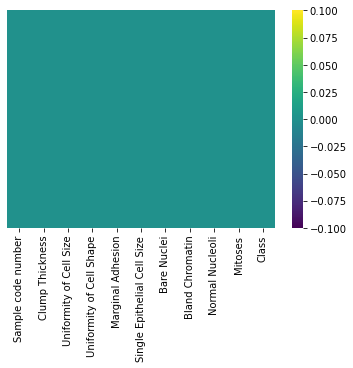

In [6]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

# no null values in the entire dataset

<AxesSubplot:>

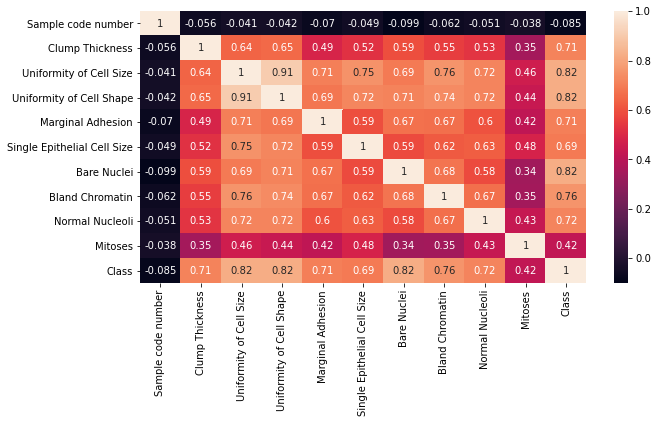

In [7]:
plt.figure(figsize = (10, 5))
sns.heatmap(dataset.corr(), annot = True, annot_kws={"size":10})

<AxesSubplot:xlabel='Class', ylabel='count'>

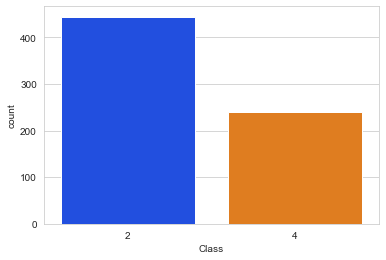

In [8]:
sns.set_style('whitegrid')
sns.countplot(x ='Class', data = dataset, palette ='bright')

# 2 - BENIGN, 4 - MALIGNANT

<AxesSubplot:xlabel='Class', ylabel='count'>

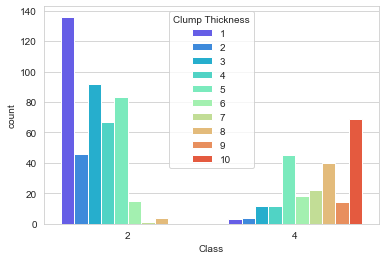

In [9]:
sns.countplot(x = 'Class', hue = 'Clump Thickness', data = dataset, palette = 'rainbow')

# 2(BENIGN) - grouped in mono-layers, 4(MALIGNANT) - grouped in multi-layer.

<AxesSubplot:xlabel='Class', ylabel='count'>

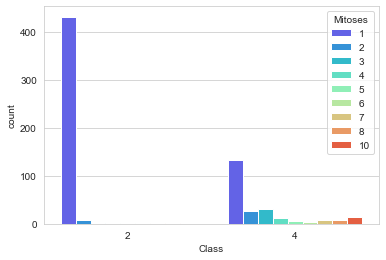

In [10]:
sns.set_style('whitegrid')
sns.countplot(x = 'Class', hue = 'Mitoses', data = dataset, palette = 'rainbow')

# 2(BENIGN) - small value(1,2), 4(MALIGNANT) - large value(10,8,...)

In [11]:
# Drop a column

dataset.drop('Sample code number', inplace = True, axis = 1)

print(dataset.shape)
dataset.head()

(683, 10)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [12]:
# about dataset after droping a column

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [13]:
# Split sample into Train and Test

from sklearn.model_selection import train_test_split
Train,Test = train_test_split(dataset, test_size = 0.3, random_state = 176)

# Print a few rows
Train.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
94,2,1,1,2,2,1,1,1,1,2
425,10,4,3,10,4,10,10,1,1,4
71,9,4,5,10,6,10,4,8,1,4
85,3,6,6,6,5,10,6,8,3,4
321,1,1,1,1,2,1,1,1,1,2


In [14]:
# spliting independent variables and target variables for training

Train_IndepentVars = Train.values[:, :9]
Train_TargetVar = Train.values[:,9]

In [15]:
Train_IndepentVars[:10]

array([[ 2,  1,  1,  2,  2,  1,  1,  1,  1],
       [10,  4,  3, 10,  4, 10, 10,  1,  1],
       [ 9,  4,  5, 10,  6, 10,  4,  8,  1],
       [ 3,  6,  6,  6,  5, 10,  6,  8,  3],
       [ 1,  1,  1,  1,  2,  1,  1,  1,  1],
       [10,  8,  8,  4, 10, 10,  8,  1,  1],
       [ 3,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 1,  2,  3,  1,  2,  1,  1,  1,  1],
       [ 8, 10, 10,  8,  6,  9,  3, 10, 10],
       [ 3,  1,  1,  1,  2,  1,  1,  1,  1]], dtype=int64)

In [16]:
Train_TargetVar[:10]

array([2, 4, 4, 4, 2, 4, 2, 2, 4, 2], dtype=int64)

In [17]:
# about training dataset

print ("Total rows = ", len(Train_TargetVar))
print ("Total class 2 - rows = ", (Train_TargetVar == 2).sum())
print ("Total class 4 - rows = ",(Train_TargetVar == 4).sum())

Total rows =  478
Total class 2 - rows =  312
Total class 4 - rows =  166


In [18]:
# spliting independent variables and target variables for testing

Test_IndepentVars = Test.values[:, :9]
Test_TargetVar = Test.values[:,9]

In [19]:
Test_IndepentVars[0:10]

array([[ 5,  1,  1,  6,  3,  1,  1,  1,  1],
       [ 6,  3,  2,  1,  3,  4,  4,  1,  1],
       [ 4,  1,  1,  1,  1,  1,  2,  1,  1],
       [ 3,  1,  1,  1,  2,  1,  2,  1,  1],
       [ 6,  3,  3,  5,  3, 10,  3,  5,  3],
       [ 5,  1,  2,  1,  2,  1,  3,  1,  1],
       [ 4,  2,  1,  1,  2,  1,  2,  1,  1],
       [ 4,  1,  1,  2,  2,  1,  2,  1,  1],
       [10,  5, 10,  3,  5,  8,  7,  8,  3],
       [ 4,  3,  2,  1,  3,  1,  2,  1,  1]], dtype=int64)

In [20]:
# training the model on training set

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(Train_IndepentVars, Train_TargetVar)

GaussianNB()

In [22]:
# predicting the class of test dataset

Test_TargetVar_pred = gnb.predict(Test_IndepentVars) 

In [24]:
#classification report

from sklearn.metrics import classification_report
print(classification_report(Test_TargetVar, Test_TargetVar_pred))

              precision    recall  f1-score   support

           2       0.98      0.92      0.95       132
           4       0.88      0.96      0.92        73

    accuracy                           0.94       205
   macro avg       0.93      0.94      0.93       205
weighted avg       0.94      0.94      0.94       205



In [25]:
#confusion matrix

from sklearn.metrics import confusion_matrix
confusion_df = pd. DataFrame(confusion_matrix(Test_TargetVar, Test_TargetVar_pred),
                            columns=['Predicted Class ' + str(class_name) for class_name in [2,4]],
                            index = ["Actual class " + str(class_name) for class_name in [2,4]])
print(confusion_df)

                Predicted Class 2  Predicted Class 4
Actual class 2                122                 10
Actual class 4                  3                 70


In [23]:
# Model Accuracy

from sklearn import metrics
print("Accuracy   : ",metrics.accuracy_score(Test_TargetVar, Test_TargetVar_pred))
print("Accuracy(%): ",metrics.accuracy_score(Test_TargetVar, Test_TargetVar_pred)*100)

Accuracy   :  0.9365853658536586
Accuracy(%):  93.65853658536587
